# Laboratory 2

## Naive Bayes Classifiers

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Create dataset (Gaussian clouds)

In [2]:
N = 300
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2, 2])
cloud2 = noise + np.array([-2, -2])
cloud3 = noise + np.array([-2, 2])
cloud4 = noise + np.array([2, -2])

In [3]:
data = np.vstack([cloud1, cloud2, cloud3, cloud4])

In [4]:
annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotation4 = [3]*N
annotations = annotation1 + annotation2 + annotation3 + annotation4

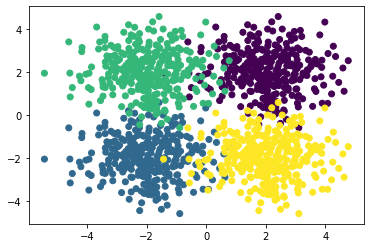

In [5]:
plt.scatter(data[:,0], data[:,1], c=annotations)

In order to evaluate your model you need to have validation set (test set). Validation set is a data your model hasn't seen before. Usually validation set is 25% of all the data.

In [6]:
# Shuffle the data since otherwise there will be the only class in the validation set
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

In [7]:
Xtrain.shape, Xtest.shape

((900, 2), (300, 2))

In [8]:
len(Ytrain), len(Ytest)

(900, 300)

## Create Gaussian Naive Classifier

In [9]:
# All the other naive bayess classifiers have the same interface.
# Change the model and see how it performs on the data.
model = GaussianNB()

In [10]:
model.fit(Xtrain, Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
pred = model.predict(Xtest)

In [12]:
def evaluate(P, T):
    # P - predictions
    # T - targets
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')

In [13]:
evaluate(model.predict(Xtest), Ytest)

95.0 %


In [14]:
# (i, j) elements stands for number of samples of class `i` classified as class `j`
# i - row
# j - column
conf_mat = confusion_matrix(Ytest, pred)
conf_mat

array([[59,  0,  3,  2],
       [ 0, 68,  0,  2],
       [ 4,  1, 68,  0],
       [ 0,  3,  0, 90]], dtype=int64)

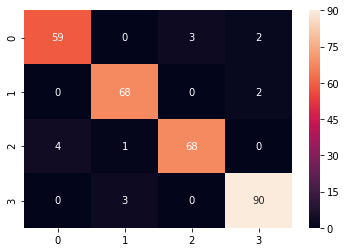

In [15]:
# Visualized confusion matrix
sns.heatmap(conf_mat, annot=True)

# Task

Build your own Bayes classifier and compare it to a sci-kit learn ones: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes. Compare accuracy and confusion matrices.
Sci-Kit Learn Naive Bayes documentation: https://scikit-learn.org/0.21/modules/naive_bayes.html

Use assignments from the first lab.